In [1]:
# 일반적은 컨벤션입니다.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Series와 DataFrame을 사용하는 일이 많으므로
# pd. 을 붙이지 않고 그냥 간단히 Series/DataFrame으로 사용하기 위해
# 직접 import를 해줍니다.
from pandas import Series, DataFrame

In [2]:
# 3x4 크기의 매트릭스를 만들고 이를 이용해서 DataFrame을 생성해보겠습니다.
df = DataFrame(np.random.randn(3,4))
df

,0,1,2,3
0,1.348254,-1.087549,0.593535,0.257625
1,-0.651305,1.143907,-0.361448,1.891329
2,0.228495,0.015409,1.467920,1.028737


In [3]:
# DataFrame의 색인도 Series와 같습니다.
df.index

Int64Index([0, 1, 2], dtype='int64')

In [4]:
# DataFrame에는 Series에는 없는 columns이 있습니다.
df.columns

Int64Index([0, 1, 2, 3], dtype='int64')

In [5]:
# pd.Series가 담긴 사전을 만들고 이를 이용해서 DataFrame을 만들어 보겠습니다.
fruit_d = {
    'Shop A' : Series({
            'apple': 50,
            'orange': 10,
            'pineapple': 5,
            'banana': 5
        }),
    'Shop B' : Series({
            'apple': 500,
            'melon': 1000,
            'cherry': 5000,
            'banana': 100
        })
}
fruits = DataFrame(fruit_d)
fruits

,Shop A,Shop B
apple,50,500
banana,5,100
cherry,NaN,5000
melon,NaN,1000
orange,10,NaN
pineapple,5,NaN


In [6]:
# Dictionary of List
# 리스트의 사전으로도 DataFrame을 만들 수 있습니다.
# 2단부터 4단까지의 구구단을 담고 있는 사전을 만들어 보겠습니다.
d = {
    'two': [2, 4, 6, 8, 10, 12, 14, 16, 18],
    'three': [3 * x for x in range(1,10)],
    'four': [4 * x for x in range(1,10)],
}
d

{'four': [4, 8, 12, 16, 20, 24, 28, 32, 36],
 'three': [3, 6, 9, 12, 15, 18, 21, 24, 27],
 'two': [2, 4, 6, 8, 10, 12, 14, 16, 18]}

In [7]:
# 3,4단은 직접 값을 입력하지 않고 list comprehension으로 생성했습니다.
[3 * x for x in range(1,10)]

[3, 6, 9, 12, 15, 18, 21, 24, 27]

In [8]:
# 이렇게 만들어진 사전 d를 이용해서 DataFrame을 생성합니다.
DataFrame(d)

,four,three,two
0,4,3,2
1,8,6,4
2,12,9,6
3,16,12,8
4,20,15,10
5,24,18,12
6,28,21,14
7,32,24,16
8,36,27,18


In [10]:
# 클립보드에 있는 내용으로도 DataFrame을 생성할 수 있습니다.
# 수업 중에는 kobis의 박스 오피스 정보 (http://goo.gl/QbKynw) 페이지에 약간의 트릭을 써서
# DataFrame으로 바꿨는데요. 내부적으로 복잡한 레이아웃을 가진 페이지의 경우 잘 동작하지 않습니다.
# Wikipedia의 테이블처럼 단순한 모양일 경우 어느정도는 잘 동작하는 것 같습니다.
#
# 수업 중에 브라우저의 개발자 콘솔을 이용해서 거슬리는 버튼을 날린 코드는 아래와 같습니다.
# $('button[class^=btn_]').hide()
#
# 버튼을 모두 없애고 필요한 내용을 긁어 바로 시도했지만 DataFrame의 모양이 깨졌고
# 구글 시트에 붙여넣었다가 그 내용을 다시 복사한 뒤 아래 코드를 실행해서 DataFrame을 만들 수 있었습니다.
#df = pd.read_clipboard()
#
# read_csv() 외에도 Excel 파일을 읽어서 DataFrame을 만들어 주는 read_excel()함수도 있습니다.
# 이 노트북에서는 csv 파일에서 읽어오도록 하겠습니다.
df = pd.read_csv('kobis.csv')

In [11]:
# 50위까지 들어 있으므로 인덱스도 50개
df.index

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
            34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49],
           dtype='int64')

In [12]:
# 컬럼
df.columns

Index(['순위', '영화명', '개봉일', '매출액', '매출액 점유율', '관객수', '스크린수', '상영횟수'], dtype='object')

In [13]:
# 컬럼 이름으로 선택. 잘 동작하지만
# 주석이라면 괜찮지만 코드에 한글을 쓰는건 아직은 좀 이른 듯 합니다. ^^;
# 1주차때 rename() 함수로 컬럼 이름을 변경한 것처럼 직접 변경해보세요! 
df.영화명

0                       암살
1                      베테랑
2         어벤져스: 에이지 오브 울트론
3                     국제시장
4           킹스맨 : 시크릿 에이전트
5           미션 임파서블: 로그네이션
6                     연평해전
7                   쥬라기 월드
8                  인사이드 아웃
9         조선명탐정 : 사라진 놉의 딸
10           매드 맥스: 분노의 도로
11            분노의 질주: 더 세븐
12              터미네이터 제니시스
13                      스물
14                    극비수사
15                   빅 히어로
16                    미니언즈
17                     스파이
18                  악의 연대기
19                 강남 1970
20                     앤트맨
21                 뷰티 인사이드
22                  오늘의 연애
23                   테이큰 3
24                이미테이션 게임
25                 샌 안드레아스
26                     쎄시봉
27                    위플래쉬
28               마다가스카의 펭귄
29                   차이나타운
30                    장수상회
31                      간신
32      박물관이 살아있다 : 비밀의 무덤
33                  미쓰 와이프
34                     허삼관
35         님아, 그 강을 건너지 마오
36                    살인의뢰
3

In [14]:
# 일반적인 방법입니다.
df['영화명']

0                       암살
1                      베테랑
2         어벤져스: 에이지 오브 울트론
3                     국제시장
4           킹스맨 : 시크릿 에이전트
5           미션 임파서블: 로그네이션
6                     연평해전
7                   쥬라기 월드
8                  인사이드 아웃
9         조선명탐정 : 사라진 놉의 딸
10           매드 맥스: 분노의 도로
11            분노의 질주: 더 세븐
12              터미네이터 제니시스
13                      스물
14                    극비수사
15                   빅 히어로
16                    미니언즈
17                     스파이
18                  악의 연대기
19                 강남 1970
20                     앤트맨
21                 뷰티 인사이드
22                  오늘의 연애
23                   테이큰 3
24                이미테이션 게임
25                 샌 안드레아스
26                     쎄시봉
27                    위플래쉬
28               마다가스카의 펭귄
29                   차이나타운
30                    장수상회
31                      간신
32      박물관이 살아있다 : 비밀의 무덤
33                  미쓰 와이프
34                     허삼관
35         님아, 그 강을 건너지 마오
36                    살인의뢰
3

In [15]:
# df[]로 선택을 할 때, 리스트 ['영화명', '관객수']를 넣어 여러 컬럼을 선택할 수도 있습니다.
# 다양하게 실습해보세요.
df[['영화명', '관객수']]

,영화명,관객수
0,암살,"12,609,764"
1,베테랑,"12,354,243"
2,어벤져스: 에이지 오브 울트론,"10,494,499"
3,국제시장,"8,914,461"
4,킹스맨 : 시크릿 에이전트,"6,129,681"
5,미션 임파서블: 로그네이션,"6,123,985"
6,연평해전,"6,040,997"
7,쥬라기 월드,"5,546,792"
8,인사이드 아웃,"4,963,184"
9,조선명탐정 : 사라진 놉의 딸,"3,872,015"


In [16]:
# 전체를 다 볼 필요는 없고 일부만 선택하고 싶을 때 사용합니다.
# 처음 5개의 row를 반환합니다.
df.head()

,순위,영화명,개봉일,매출액,매출액 점유율,관객수,스크린수,상영횟수
0,1,암살,7/22/2015,"97,731,728,481",8.00%,"12,609,764","1,519","170,854"
1,2,베테랑,8/5/2015,"96,802,406,332",7.90%,"12,354,243","1,115","168,846"
2,3,어벤져스: 에이지 오브 울트론,4/23/2015,"88,582,586,366",7.20%,"10,494,499","1,843","191,778"
3,4,국제시장,12/17/2014,"69,834,353,034",5.70%,"8,914,461","1,044","148,998"
4,5,킹스맨 : 시크릿 에이전트,2/11/2015,"50,369,009,795",4.10%,"6,129,681",728,"139,988"


In [17]:
# 넘겨준 인자 수 만큼을 반환합니다.
df.head(3)

,순위,영화명,개봉일,매출액,매출액 점유율,관객수,스크린수,상영횟수
0,1,암살,7/22/2015,"97,731,728,481",8.00%,"12,609,764","1,519","170,854"
1,2,베테랑,8/5/2015,"96,802,406,332",7.90%,"12,354,243","1,115","168,846"
2,3,어벤져스: 에이지 오브 울트론,4/23/2015,"88,582,586,366",7.20%,"10,494,499","1,843","191,778"


In [18]:
# head()와 유사하지만 처음 row가 아닌 마지막 row를 반환합니다.
df.tail()

,순위,영화명,개봉일,매출액,매출액 점유율,관객수,스크린수,상영횟수
45,46,도라에몽 : 스탠 바이 미,2/12/2015,"3,684,756,429",0.30%,"503,968",432,"13,063"
46,47,위험한 상견례 2,4/29/2015,"3,575,384,754",0.30%,"472,693",429,"18,409"
47,48,명탐정 코난 : 화염의 해바라기,8/5/2015,"3,294,690,400",0.30%,"470,942",433,"8,872"
48,49,순수의 시대,3/5/2015,"3,740,948,828",0.30%,"469,891",546,"23,623"
49,50,"협녀, 칼의 기억",8/13/2015,"3,353,201,989",0.30%,"430,402",572,"16,086"


In [19]:
# 마찬가지로 인자를 넘겨서 원하는 크기를 지정할 수 있습니다.
df.tail(3)

,순위,영화명,개봉일,매출액,매출액 점유율,관객수,스크린수,상영횟수
47,48,명탐정 코난 : 화염의 해바라기,8/5/2015,"3,294,690,400",0.30%,"470,942",433,"8,872"
48,49,순수의 시대,3/5/2015,"3,740,948,828",0.30%,"469,891",546,"23,623"
49,50,"협녀, 칼의 기억",8/13/2015,"3,353,201,989",0.30%,"430,402",572,"16,086"


In [20]:
# 관객수가 500만 이하인 영화만 선택하려고 했지만 에러가 발생합니다.
df[ df['관객수'] < 5000000 ].head()

TypeError: unorderable types: str() < int()

In [21]:
# '관객수'의 데이터는 숫자가 아니라 문자열이므로 숫자로 변환합니다.
# 바뀐 dtype을 확인하세요.
df['관객수'].apply(lambda x: int(x.replace(',', '')))

0     12609764
1     12354243
2     10494499
3      8914461
4      6129681
5      6123985
6      6040997
7      5546792
8      4963184
9      3872015
10     3842441
11     3247955
12     3240370
13     3044134
14     2860786
15     2801949
16     2618077
17     2318748
18     2192525
19     2192172
20     2112943
21     1946155
22     1891993
23     1860934
24     1743936
25     1716455
26     1715370
27     1587631
28     1512340
29     1472006
30     1165077
31     1110246
32     1101678
33      968279
34      955679
35      955171
36      855980
37      828025
38      825517
39      786257
40      716491
41      681945
42      573661
43      550720
44      522929
45      503968
46      472693
47      470942
48      469891
49      430402
Name: 관객수, dtype: int64

In [22]:
# 하지만 또 에러
df[ df['관객수'] < 5000000 ].head()

TypeError: unorderable types: str() < int()

In [23]:
# apply()는 실제로 df의 값을 변경하지 않고 새로운 DataFrame을 반환하므로
# 결과를 df['관객수']에 대입합니다.
df['관객수'] = df['관객수'].apply(lambda x: int(x.replace(',', '')))

In [24]:
# 위 코드에서 apply()에 사용한 lambda 함수는
f = lambda x: int(x.replace(',', ''))

In [25]:
# 길게 풀어쓰면 다음 함수와 비슷합니다.
# atoi는 인자 x를 받아서
def atoi(x):
    # replace() 함수를 이용해서 ','를 모두 ''로 바꿉니다.
    # 즉, 모든 ','를 지웁니다.
    stripped = x.replace(',', '')
    # 그리고 그 결과를 정수로 변환하고
    val = int(stripped)
    # 정수로 변환된 값을 반환합니다.
    return val

In [26]:
# '스크린수'도 정수로 바꾸겠습니다.
df['스크린수'] = df['스크린수'].apply(f)

In [27]:
%matplotlib inline
from matplotlib import rcParams, style
style.use('ggplot')
# Windows에서 한글 폰트는 series.ipynb 파일을 참조하세요.
rcParams['font.family'] = 'NanumGothicOTF'

/Users/scari/.pyenv/versions/anaconda3-2.3.0/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


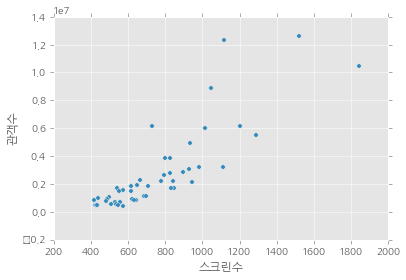

In [28]:
# kind에 'scatter'를 넘겨서 산포도를 그려보겠습니다.
df.plot(kind='scatter', x='스크린수', y='관객수')

In [29]:
# 상영횟수도 정수로 바꾸고
df['상영횟수'] = df['상영횟수'].apply(f)

/Users/scari/.pyenv/versions/anaconda3-2.3.0/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


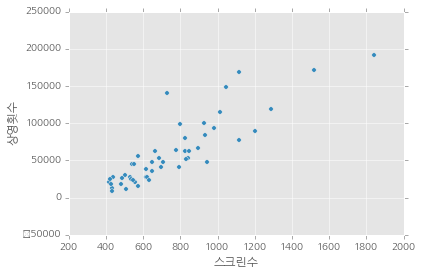

In [30]:
# 스크린스와 상영회수의 산포도를 그려봅니다.
df.plot(kind='scatter', x='스크린수', y='상영횟수')

In [31]:
# '관객수'의 최소값
df['관객수'].min()

430402

In [32]:
# 최다 '관객수'
df['관객수'].max()

12609764

In [33]:
# 간단하게 볼 수 있는 describe() 함수도 존재합니다.
df.describe()

,순위,관객수,스크린수,상영횟수
count,50.00000,50.000000,50.000000,50.000000
mean,25.50000,2758281.840000,751.460000,59792.080000
std,14.57738,2959677.751243,293.678723,44853.302758
min,1.00000,430402.000000,416.000000,8872.000000
25%,13.25000,835013.750000,542.250000,26422.500000
50%,25.50000,1730195.500000,676.500000,47331.000000
75%,37.75000,3191311.000000,882.250000,79771.250000
max,50.00000,12609764.000000,1843.000000,191778.000000


In [36]:
df = pd.read_clipboard()

In [37]:
df

,순위,영화명,개봉일,매출액,매출액.1,점유율,관객수,스크린수,상영횟수
0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,베테랑,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2015-08-05,"105,167,917,250",6.6%,"13,413,971","1,115","199,221",NaN,NaN,NaN
3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,암살,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2015-07-22,"98,457,118,281",6.1%,"12,704,945","1,519","175,171",NaN,NaN,NaN
6,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,어벤져스:,에이지,오브,울트론,NaN,NaN,NaN,NaN,NaN
8,2015-04-23,"88,582,586,366",5.5%,"10,494,499","1,843","191,778",NaN,NaN,NaN
9,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
